In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings; warnings.simplefilter('ignore')

In [2]:
file = pd.read_csv('results_survey.csv', sep =',')
total_responses =len(file)
print("The total number of responses received is {}.\n".format(len(file)))

The total number of responses received is 82.



In [3]:
file.columns

Index(['ID de la réponse', 'Date de soumission', 'Dernière page',
       'Langue de départ', 'Tête de série', 'Date de lancement',
       'Date de la dernière action', 'Adresse IP', 'URL référente',
       'Nom &amp; Post-nom /Firstname and Surname',
       ...
       'Durée pour la question: conn08', 'Durée pour la question: conn09',
       'Durée pour la question: conn10', 'Durée pour la question: conn11',
       'Durée pour le groupe : MESURAGE D'INTERNET',
       'Durée pour la question: meas01', 'Durée pour la question: meas02',
       'Durée pour la question: meas03', 'Durée pour la question: meas04',
       'Durée pour la question: meas05'],
      dtype='object', length=205)

In [4]:
file = file.drop(file.filter(regex='Durée').columns, axis=1)
file = file.drop(file.filter(regex='URL').columns, axis=1)
file = file.drop(file.columns[[range(0,7)]], axis=1)


In [5]:
file.rename(columns={file.columns[0]: 'IP'
                    , file.columns[1]: 'names'\
                    , file.columns[2]: 'genderM'\
                    ,file.columns[3]: 'genderF'\
                    ,file.columns[4]: 'otherGender'\
                     ,file.columns[5]: 'noAgegroup'\
                     ,file.columns[6]: 'age18_25'\
                     ,file.columns[7]: 'age26_35'\
                     ,file.columns[8]: 'age36_45'\
                     ,file.columns[9]: 'age46_55'\
                     ,file.columns[10]: 'age56+'\
                     ,file.columns[37]: 'town'\
                     , file.columns[38]: 'student'\
                     , file.columns[39]: 'self_employed'\
                     ,file.columns[40]: 'employed'\
                     ,file.columns[41]: 'unemployed'\
                     ,file.columns[42]: 'otherOccupation'\
                     ,file.columns[99]: 'speedtest_veryconcerned'\
                     ,file.columns[100]: 'speedtest_concerned'\
                     ,file.columns[101]: 'speedtest_notconcerned'\
                     ,file.columns[102]: 'speedtest_dontcare'\
                     ,file.columns[103]: 'internet_verysatisfied'\
                     ,file.columns[105]: 'internet_satisfied'\
                     ,file.columns[107]: 'internet_neutral'\
                     ,file.columns[109]: 'internet_dissatisfied'\
                     ,file.columns[111]: 'internet_verydissastisfied'\
                     ,file.columns[131]: 'promise1_3mbps'\
                     ,file.columns[132]: 'promise5_10mbps'\
                     ,file.columns[133]: 'promiseless_25mbps'\
                     ,file.columns[134]: 'promisemore_1gbps'\
                     ,file.columns[135]: 'promise_notaware'\
                     ,file.columns[136]: 'percievedspeed1_3mbps'\
                     ,file.columns[137]: 'percievedspeed5_10mbps'\
                     ,file.columns[138]: 'percievedspeed_25mbps'\
                     ,file.columns[139]: 'percievedspeed_1gbps'\
                     ,file.columns[140]: 'percievedspeed_notaware'\
                     ,file.columns[68]: 'qoe_pageloadingtime'\
                     ,file.columns[69]: 'qoe_livevideofreezes'\
                     ,file.columns[70]: 'qoe_voicecalldropouts'\
                     ,file.columns[71]: 'qoe_videocalldropouts'\
                     ,file.columns[72]: 'qoe_textmessagedeliverydelays'\
#                      ,file.columns[91]: 'Airtel'\
#                      ,file.columns[92]: 'Vodacom'\
#                      ,file.columns[93]: 'Orange'\
#                      ,file.columns[95]: 'OtherISP'\
                     
                     
                     
                     
                     
                     
                    }, inplace=True)


In [6]:
#count the responses and the towns 
df = file
print("Total Number of responses: {}".format(len(df)))
print("Number of towns that responded: {}".format(len(df['town'].value_counts())))#minus 1 of 'Other'
print("Responses with no country specified: {}\n".format(len(df[df['town'] == ""])))

Total Number of responses: 82
Number of towns that responded: 12
Responses with no country specified: 0



In [7]:
# #participants who are unaware of their promissed speeds
runm = len(df[['student', 'self_employed', 'employed','unemployed','otherOccupation']][df['promise_notaware']=="Oui"])
runperc = round(runm/len(df)*100, 2)
print("Total number participants are unaware of their promised speeds: {} or {}% of all responses"\
      .format(runm, runperc))

Total number participants are unaware of their promised speeds: 28 or 34.15% of all responses


In [8]:
#percent of elements
def calc_percent(element, df):
    percentage = round(element/len(df)*100, 2)
    return percentage

In [9]:
#survey participants per occupation
students = len(df[df['student']=='Oui'])
self_employed = len(df[df['self_employed']=='Oui'])
employed = len(df[df['employed']=='Oui'])
unemployed = len(df[df['unemployed']=='Oui'])
otherOccupation = len(df[df['otherOccupation']=='Oui'])

print (""" Participants per occupation: '\n'
        - students : {} or {}% '\n'
        - selfemployed : {} or {}% '\n'
        - employed : {} or {}% '\n'
        - unemployed : {} or {}% '\n'
        - others : {} or {}% '\n' """\
      .format(students,calc_percent(students,df),self_employed,calc_percent(self_employed,df),
              employed,calc_percent(employed,df), unemployed,calc_percent(unemployed,df),
              otherOccupation,calc_percent(otherOccupation,df)
             ))
    

 Participants per occupation: '
'
        - students : 28 or 34.15% '
'
        - selfemployed : 24 or 29.27% '
'
        - employed : 29 or 35.37% '
'
        - unemployed : 9 or 10.98% '
'
        - others : 0 or 0.0% '
' 


In [10]:
#Number of Response by town
df1 = df.set_index('town')
print("\nNumber of towns that responded: {}".format(len(df1.index.unique()) - 1))
count = {}
for i in df1.index.unique().tolist():
    name = str(i)
    length = len(df1.loc[name])
    if length >150:
        length =1
    count.update({name:length })
count


Number of towns that responded: 11


{'Goma': 31,
 'Kinshasa': 24,
 'Lubumbashi': 8,
 'Kananga': 1,
 'Isiro': 1,
 'Bukavu': 9,
 'Mbujimayi': 1,
 'Beni': 3,
 'Bunia': 1,
 'Moba': 1,
 'Kambove': 1,
 'Kisangani': 1}

In [11]:
def makeup():
    towns={}
    for i in df['town'].unique().tolist():
        if i != '':
            name = str(i)
            length = len(df.loc[df['town'] == name])
            towns.update({name:length })
    towns = {k: v for k, v in sorted(towns.items(), reverse=True, key=lambda x: x[1])} 
    return towns
towns = makeup()
town_names = towns.keys()
town_count= towns.values()

towns_repartition = pd.DataFrame()
towns_repartition ['town'] = town_names
towns_repartition['counts'] = town_count
towns_repartition['counts'] = towns_repartition['counts'].astype(int)
towns_repartition['town'] = towns_repartition['town'].astype(str)
towns_repartition

,town,counts
0,Goma,31
1,Kinshasa,24
2,Bukavu,9
3,Lubumbashi,8
4,Beni,3
5,Kananga,1
6,Isiro,1
7,Mbujimayi,1
8,Bunia,1
9,Moba,1


In [12]:
#Number of responses by occupation and whether they are satisfied of their internet experience

satisfied = df[['town','internet_verysatisfied','internet_satisfied','internet_neutral', 'internet_dissatisfied','internet_verydissastisfied']][df['internet_satisfied']=="Oui"]
satisfied = satisfied.groupby('town').agg({'internet_satisfied': 'count'})
responses = pd.Series(count)
final =  pd.concat([responses,satisfied], axis=1, join='outer')
final.fillna(0, inplace=True)
final['internet_satisfied'] = final['internet_satisfied'].astype(int)
final.rename(columns={final.columns[0]: 'Total Number of Responses',
                 'internet_satisfied':'satisfied users'}, inplace=True)
final['% satisfied'] = round((final['satisfied users'\
                                              ]/final['Total Number of Responses'])*100, 2)

internet_verysatisfied = df[['town','internet_verysatisfied','internet_satisfied','internet_neutral', 'internet_dissatisfied','internet_verydissastisfied']][df['internet_verysatisfied']=="Oui"]
internet_verysatisfied = internet_verysatisfied.groupby('town').agg({'internet_verysatisfied': 'count'})

internet_neutral = df[['town','internet_verysatisfied','internet_satisfied','internet_neutral', 'internet_dissatisfied','internet_verydissastisfied']][df['internet_neutral']=="Oui"]
internet_neutral = internet_neutral.groupby('town').agg({'internet_neutral': 'count'})
final =  pd.concat([final,internet_neutral], axis=1, join='outer')
final.fillna(0, inplace=True)
final['internet_neutral'] = final['internet_neutral'].astype(int)
final.rename(columns={'internet_neutral':'neutral users'}, inplace=True)
final['% neutral'] = round((final['neutral users'\
                                              ]/final['Total Number of Responses'])*100, 2)


internet_dissatisfied = df[['town','internet_verysatisfied','internet_satisfied','internet_neutral', 'internet_dissatisfied','internet_verydissastisfied']][df['internet_dissatisfied']=="Oui"]
internet_dissatisfied = internet_dissatisfied.groupby('town').agg({'internet_dissatisfied': 'count'})
final =  pd.concat([final,internet_dissatisfied], axis=1, join='outer')
final.fillna(0, inplace=True)
final['internet_dissatisfied'] = final['internet_dissatisfied'].astype(int)
final.rename(columns={'internet_dissatisfied':'dis-satisfied users'}, inplace=True)
final['% dis-satisfied'] = round((final['dis-satisfied users'\
                                              ]/final['Total Number of Responses'])*100, 2)



# satisfied.reset_index(inplace =True)
# satisfied = satisfied.rename(columns = {'index':'town'})
satisfied = satisfied.sort_values(by = ['internet_satisfied'], ascending=False)
internet_verysatisfied = internet_verysatisfied.sort_values(by = ['internet_verysatisfied'], ascending=False)
internet_neutral = internet_neutral.sort_values(by = ['internet_neutral'], ascending=False)
internet_dissatisfied = internet_dissatisfied.sort_values(by = ['internet_dissatisfied'], ascending=False)
# airtel = airtel.sort_values(by = ['Airtel'], ascending=False)
# vodacom = vodacom.sort_values(by = ['Vodacom'], ascending=False)
# orange = orange.sort_values(by = ['Orange'], ascending=False)
# otherIsp = otherIsp.sort_values(by = ['OtherISP'], ascending=False)

final

,Total Number of Responses,satisfied users,% satisfied,neutral users,% neutral,dis-satisfied users,% dis-satisfied
Goma,31,8,25.81,7,22.58,15,48.39
Kinshasa,24,12,50.00,7,29.17,4,16.67
Lubumbashi,8,4,50.00,0,0.00,1,12.50
Kananga,1,1,100.00,0,0.00,0,0.00
Isiro,1,1,100.00,0,0.00,0,0.00
Bukavu,9,0,0.00,5,55.56,3,33.33
Mbujimayi,1,0,0.00,0,0.00,1,100.00
Beni,3,0,0.00,1,33.33,0,0.00
Bunia,1,0,0.00,0,0.00,1,100.00
Moba,1,0,0.00,0,0.00,0,0.00


In [13]:
# #participant networks

# airtel = df[['town','Airtel']][df['Airtel']=="Oui"]
# airtel = airtel.groupby('town').agg({'Airtel': 'count'})
# responses = pd.Series(count)
# networks_df =  pd.concat([responses,airtel], axis=1, join='outer')
# networks_df.fillna(0, inplace=True)
# networks_df['Airtel'] = networks_df['Airtel'].astype(int)
# networks_df.rename(columns={networks_df.columns[0]: 'Total Number of Responses'}, inplace=True)
# networks_df['% Airtel'] = round((networks_df['Airtel'\
#                                         ]/networks_df['Total Number of Responses'])*100, 2)

# vodacom = df[['town','Vodacom']][df['Vodacom']=="Oui"]
# vodacom = vodacom.groupby('town').agg({'Vodacom': 'count'})
# networks_df =  pd.concat([networks_df,vodacom], axis=1, join='outer')
# networks_df.fillna(0, inplace=True)
# networks_df['Vodacom'] = networks_df['Vodacom'].astype(int)
# networks_df['% Vodacom'] = round((networks_df['Vodacom'\
#                                         ]/networks_df['Total Number of Responses'])*100, 2)

# orange = df[['town','Orange']][df['Orange']=="Oui"]
# orange = orange.groupby('town').agg({'Orange': 'count'})
# networks_df =  pd.concat([networks_df,orange], axis=1, join='outer')
# networks_df.fillna(0, inplace=True)
# networks_df['Orange'] = networks_df['Orange'].astype(int)
# networks_df['% Orange'] = round((networks_df['Orange'\
#                                         ]/networks_df['Total Number of Responses'])*100, 2)

# otherIsp = df[['town','OtherISP']][df['OtherISP']=="Oui"]
# otherIsp = otherIsp.groupby('town').agg({'OtherISP': 'count'})
# networks_df =  pd.concat([networks_df,otherIsp], axis=1, join='outer')
# networks_df.fillna(0, inplace=True)
# networks_df['OtherISP'] = networks_df['OtherISP'].astype(int)
# networks_df['% OtherISP'] = round((networks_df['OtherISP'\
#                                         ]/networks_df['Total Number of Responses'])*100, 2)

# # networks_df.reset_index(inplace =True)
# # networks_df = networks_df.drop('index', axis =1)
# networks_df

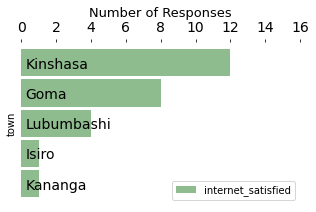

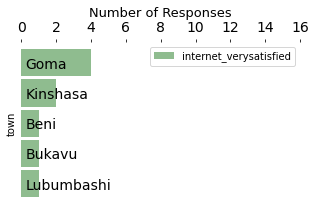

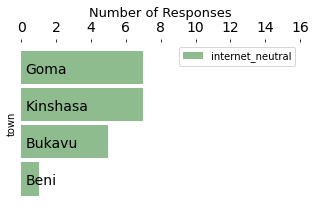

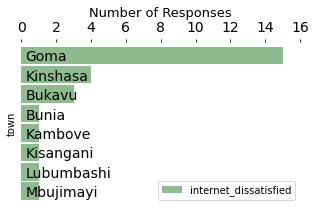

In [14]:
list_satisfied = [satisfied,internet_verysatisfied,internet_neutral, internet_dissatisfied]
for a_df in list_satisfied:
    
    a_df = a_df.iloc[::-1] ##Reversing the index to have the higher values on top


    ax = a_df.plot(kind='barh', width=.9, figsize=(5,3), color='darkseagreen')

    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    ax.yaxis.tick_right()
    ax.tick_params(axis="y", which='major', length=0)
    ax.tick_params(axis="y",direction="in", pad=-275)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('Number of Responses', fontdict={'fontsize': 13})
    ax.set_xticks([0,2,4,6,8,10,12,14,16])
    #plt.savefig('figures/network_responses.pdf', bbox_inches = 'tight')
    plt.show()


In [15]:
#Whether a business category has run some measurement or not

def internetspeedconcern():
    internetspeed = df[['town', 'speedtest_veryconcerned']][df['speedtest_veryconcerned']=="Oui"]
    internetspeed = internetspeed.groupby('town').agg({'speedtest_veryconcerned': 'count'})
    responses = pd.Series(count)
    final = pd.concat([responses, internetspeed], axis=1, join='outer')
    final.rename(columns={final.columns[0]: 'Total Number of Responses'}, inplace=True)    
    final['% Running very concerned'] = round((final['speedtest_veryconcerned']\
                                            /final['Total Number of Responses'])*100, 2)
    final = final.sort_values(by = ['Total Number of Responses'], ascending=False)
    return final
internetspeedconcern()

,Total Number of Responses,speedtest_veryconcerned,% Running very concerned
Goma,31,16.0,51.61
Kinshasa,24,19.0,79.17
Bukavu,9,5.0,55.56
Lubumbashi,8,5.0,62.50
Beni,3,2.0,66.67
Kananga,1,1.0,100.00
Isiro,1,1.0,100.00
Mbujimayi,1,1.0,100.00
Bunia,1,1.0,100.00
Moba,1,NaN,NaN


In [16]:
file.columns[93].split('[')[1].split(']')[0]

'Orange'

       Airtel  Vodacom  Orange  Supercell  Autres/Other
0         1.0      0.0     1.0        0.0           0.0
1         1.0      0.0     0.0        0.0           0.0
2         1.0      1.0     1.0        0.0           0.0
3         1.0      1.0     1.0        0.0           0.0
4         1.0      0.0     0.0        0.0           0.0
...       ...      ...     ...        ...           ...
78        0.0      1.0     1.0        0.0           0.0
79        1.0      0.0     1.0        0.0           0.0
80        1.0      1.0     0.0        0.0           0.0
81        1.0      0.0     0.0        0.0           0.0
Total    61.0     26.0    41.0        1.0           6.0

[83 rows x 5 columns]


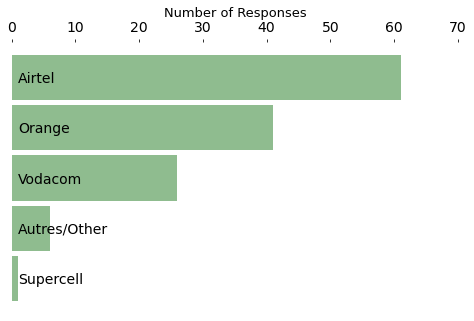

In [17]:
#Les quels de ces aspects influencent le plus votre qualite d'experience sur Internet [Le temps de chargement d'un site web / The loading time of a website]

#Purpose of Running Business
def purpose_of_measurement():
    columns =[
              'À quel fournisseur de réseau êtes-vous abonné ?/ To which network service provider are you subscribed to? [Airtel]',
              'À quel fournisseur de réseau êtes-vous abonné ?/ To which network service provider are you subscribed to? [Vodacom]',
              'À quel fournisseur de réseau êtes-vous abonné ?/ To which network service provider are you subscribed to? [Orange]',
              'À quel fournisseur de réseau êtes-vous abonné ?/ To which network service provider are you subscribed to? [Supercell]',
              'À quel fournisseur de réseau êtes-vous abonné ?/ To which network service provider are you subscribed to? [Autres/Other]']
    df1 = file[columns]
    df1.replace(('Oui', 'Non'), (1, 0), inplace=True)
    for col in df1.columns:
        name = col.split('[')[1].split(']')[0]
        df1.rename(columns={col:name}, inplace=True)
    #df1['Autres/Other'] = df1['Autres/Other'].notnull().astype(int) #Change any text in the column to 1 and NaN to 0
    df1.loc['Total',:]= df1.sum(axis=0)
    print(df1)
    data = df1.T['Total'].sort_values()
    ax = data.plot(kind='barh', width=.9, figsize=(8,5), color='darkseagreen')
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    ax.yaxis.tick_right()
    ax.tick_params(axis="y", which='major', length=0)
    ax.tick_params(axis="y",direction="in", pad=-440)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('Number of Responses', fontdict={'fontsize': 13})
    ax.set_xticks([0,10,20,30,40,50,60,70])
    #plt.savefig('figures/hinder.pdf', bbox_inches = 'tight')
    plt.show()
    
    return
purpose_of_measurement()

In [18]:
#participants who happen to be subscribed to both Airtel and Vodacom  OR both Airtel and Orange 
shared_networks = len (file.iloc[:,91:96][(((file.iloc[:,91]=='Oui') & (file.iloc[:,92]=='Oui')) |((file.iloc[:,91]=='Oui') & (file.iloc[:,93]=='Oui')))])
shared_percent = round (shared_networks / len (df)*100, 2)
print("{} participants use at least 2 networks, which represents {} % of the total respodants".format(shared_networks, shared_percent))

35 participants use at least 2 networks, which represents 42.68 % of the total respodants


{'option_Important': 47.56, 'option_Extremement important /Extremely important': 47.56, 'option_Pas important / Not important': 4.88}


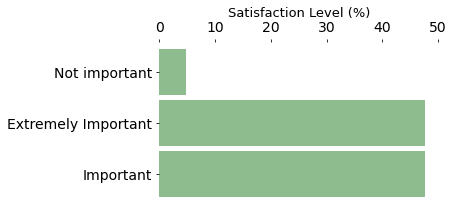

In [21]:
def likert():
    df1 = file[['town', 
              'qoe_pageloadingtime']]
    
    df1.set_index('town', inplace=True)
    df1.dropna(inplace=True)
    
    likert={} 
    grouped={}
    for value in df1['qoe_pageloadingtime'].unique():
        option = "option_{}".format(value)
        likert[option] = df1.loc[df1['qoe_pageloadingtime'] == value]
        total = likert[option].groupby(level=0).describe()['qoe_pageloadingtime', 'count'].sum()
        percent = round((total/total_responses)*100, 2)
        grouped.update({option:percent})
    
    print(grouped)
    
    grouped['Important'] = grouped.pop('option_Important')
    grouped['Extremely Important'] = grouped.pop('option_Extremement important /Extremely important')
    grouped['Not important'] = grouped.pop('option_Pas important / Not important')
#     grouped['Satisfied'] = grouped.pop('option_4')
#     grouped['Highly Satisfied'] = grouped.pop('option_5')
    
    fig, ax = plt.subplots(figsize=(5,3))
    bars = plt.barh(*zip(*grouped.items()), height=.9, color='darkseagreen')
    
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    ax.set_xlabel('Satisfaction Level (%)', fontdict={'fontsize': 13})
    ax.set_xticks([0, 10, 20, 30, 40, 50])
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    #plt.savefig('figures/likert.pdf', bbox_inches = 'tight')        
    return
likert()

In [ ]:
file.columns[68]